In [1]:
import numpy as np
import seaborn as sns
import pingouin as pg
from matplotlib import pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/MEGALEX.csv')


In [3]:
df.head()

,item,n_trials,err,rt,sd,rtz,n_used,c_freq_movies,lc_freq_movies,c_freq_books,lc_freq_books,n_letters,n_syllables
0,abaissa,25,0.04,721.833333,106.416191,-0.035017,24,0.00,#NAME?,2.64,0.421603927,7,3
1,abaissait,25,0.08,836.782609,257.778086,0.366517,23,0.02,-1.698970004,2.50,0.397940009,9,3
2,abaissant,26,0.00,773.840000,224.378713,0.254392,25,0.04,-1.397940009,2.77,0.442479769,9,3
3,abaisse,25,0.04,698.826087,246.667913,-0.216788,23,1.30,0.113943352,3.45,0.537819095,7,2
4,abaissé,25,0.00,656.782609,177.024897,-0.434544,23,0.77,-0.113509275,1.55,0.190331698,7,3


In [4]:
# remove missing data
data = df.loc[(df['lc_freq_books'] != '#NAME?')]
data['lc_freq_books'] = pd.to_numeric(data['lc_freq_books'], downcast='float')

<AxesSubplot:xlabel='n_letters', ylabel='rt'>

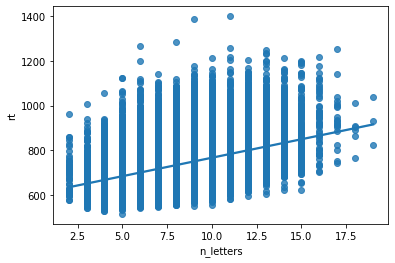

In [72]:
# Does the number of letters predict reponse time?

sns.regplot(data = data, x = 'n_letters', y = 'rt')

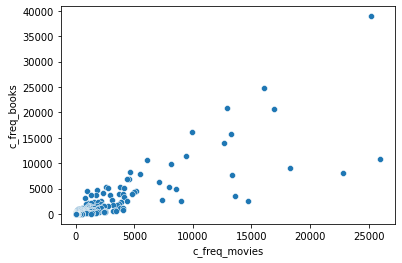

In [73]:
# Does the frequency of a word in the movies corpus correlate with the frequency of
# the same word in the books corpus?

sns.scatterplot(data = data, x = 'c_freq_movies', y = 'c_freq_books')
data = df.loc[(df['lc_freq_books'] != '#NAME?')]
data.loc[:,'lc_freq_books'] = pd.to_numeric(data.loc[:,'lc_freq_books'], downcast='float')


In [76]:
# Find the most frequent words in the books corpus

data = data.sort_values(by=['c_freq_books'], ascending=False)
words = list(data['item'])
freq = list(data['c_freq_books'])
index = [i+1 for i in range(len(freq))]

HF_words = list(zip(index, words, freq))[0:20]
HF_words = pd.DataFrame(HF_words)
HF_words.columns = ['rank', 'word', 'frequency']
HF_words.head(10)

,rank,word,frequency
0,1,de,38928.92
1,2,la,24877.30
2,3,et,20879.73
3,4,le,20735.14
4,5,les,16074.53
5,6,il,15832.16
6,7,un,13946.36
7,8,en,11402.97
8,9,je,10862.77
9,10,des,10624.93


<AxesSubplot:xlabel='rank', ylabel='frequency'>

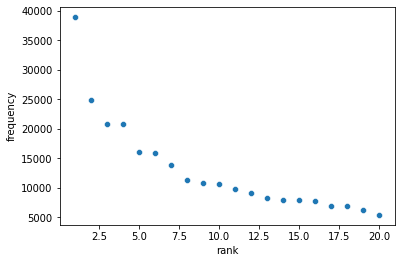

In [77]:
# Investigate how well Zipf's law applies to this corpus by plotting rank vs. frequency

sns.scatterplot(data = HF_words, x = 'rank', y = 'frequency')

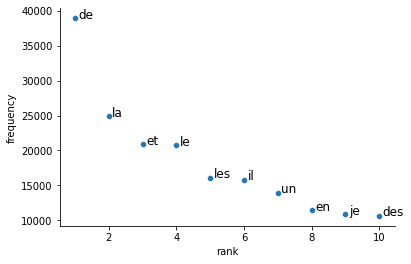

In [80]:
# Label the points


from matplotlib import pyplot as plt


ax = sns.scatterplot(data = HF_words[0:10], x = 'rank', y = 'frequency')

n = .1

for i in range(len(HF_words[0:10])):
    plt.text(HF_words['rank'][i] + n, 
             HF_words['frequency'][i] + n, 
             HF_words['word'][i], 
             fontsize=12)

sns.despine()

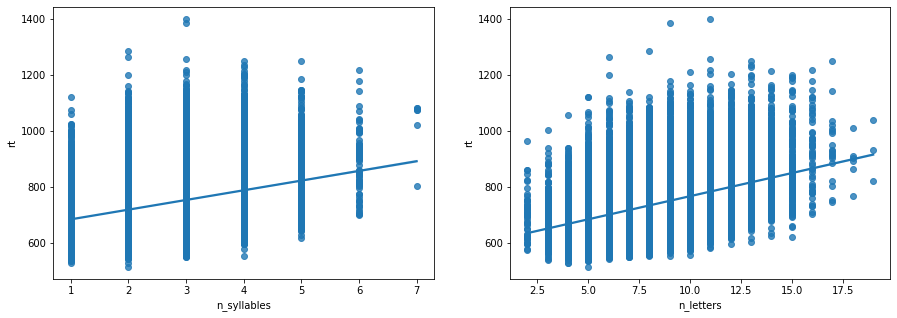

In [82]:
# Visually compare impact of number of syllables and number of letters on RT

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax0 = sns.regplot(data = data, x = 'n_syllables', y = 'rt', ax=axes[0])
ax1 = sns.regplot(data = data, x = 'n_letters', y = 'rt', ax=axes[1])

In [90]:
data[data['n_letters'] == 2]

,item,n_trials,err,rt,sd,rtz,n_used,c_freq_movies,lc_freq_movies,c_freq_books,lc_freq_books,n_letters,n_syllables
9271,de,25,0.080000,615.409091,81.500020,-0.467695,22,25220.96,4.401761613,38928.92,4.590272,2,1
21052,la,25,0.000000,727.760000,233.664517,-0.097423,25,16028.08,4.204881501,24877.30,4.395803,2,1
14633,et,24,0.166667,649.250000,145.831509,-0.521128,20,12909.08,4.110895292,20879.73,4.319725,2,1
21325,le,25,0.040000,597.791667,105.954863,-0.591781,24,16953.50,4.229259371,20735.14,4.316707,2,1
18996,il,25,0.200000,729.150000,201.873664,-0.001182,20,13223.34,4.121341165,15832.16,4.199540,2,1


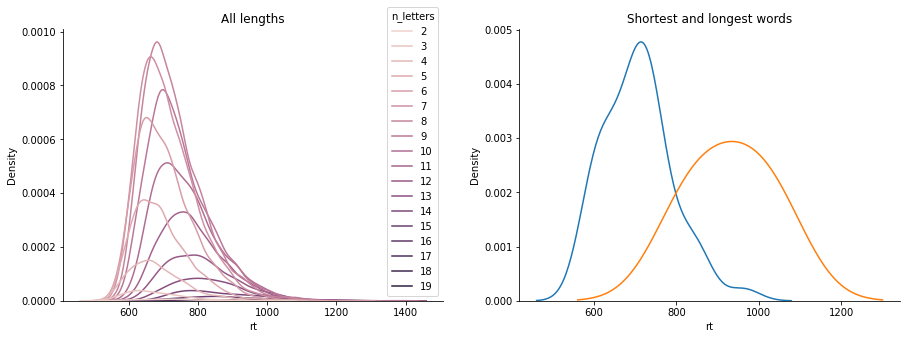

In [102]:
# Inspect distributions of RT's for word lengths

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax1 = sns.kdeplot(data = data, x = 'rt', hue = 'n_letters', ax = axes[0])

ax2 = sns.kdeplot(data = data[data['n_letters'] == 2], x = 'rt', ax = axes[1])
ax2 = sns.kdeplot(data = data[data['n_letters'] == 19], x = 'rt', ax = axes[1])

titles = ['All lengths', 'Shortest and longest words']

for n, ax in enumerate(axes):
    ax.set_title(titles[n])
    
sns.despine()